In [16]:
#Assignment

#the goal of this project is to analyze student test performance

#pick any school in this dataset as an initial comparison point

#pick a feature/measure/score

#compare above school to schools in the entire dataset, schools in a particular borough, or schools in a particular district - you only need to do one additional comparison point (but you’re welcome to do more comparisons if you feel compelled to do so)

#the analysis should include some descriptive statistics

#the analysis should include one cleaning task (or more)

#the analysis should include one visualization (or more)

#the analysis should include a brief conclusion statement (not more than two or three sentences)


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
#data set

df = pd.read_csv("https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv")

In [19]:
df.columns

Index(['School DBN', 'School Name', 'School Level', 'Regents Exam', 'Year',
       'Total Tested', 'Mean Score', 'Number Scoring Below 65',
       'Percent Scoring Below 65', 'Number Scoring 65 or Above',
       'Percent Scoring 65 or Above', 'Number Scoring 80 or Above',
       'Percent Scoring 80 or Above', 'Number Scoring CR',
       'Percent Scoring CR'],
      dtype='object')

In [20]:
print(df.head())

  School DBN                     School Name School Level  \
0     01M034  P.S. 034 Franklin D. Roosevelt          K-8   
1     01M034  P.S. 034 Franklin D. Roosevelt          K-8   
2     01M034  P.S. 034 Franklin D. Roosevelt          K-8   
3     01M140          P.S. 140 Nathan Straus          K-8   
4     01M140          P.S. 140 Nathan Straus          K-8   

          Regents Exam  Year  Total Tested Mean Score Number Scoring Below 65  \
0  Common Core Algebra  2017             4          s                       s   
1   Living Environment  2015            16       77.9                       1   
2   Living Environment  2016             9         74                       1   
3  Common Core Algebra  2016             3          s                       s   
4  Common Core Algebra  2017             2          s                       s   

  Percent Scoring Below 65 Number Scoring 65 or Above  \
0                        s                          s   
1                      6.3      

In [21]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [29]:
for name in school_names:
    print(name)

NameError: name 'school_names' is not defined

In [24]:
#pick a feature/measure/score

df.dtypes

,0
school_dbn,object
school_name,object
school_level,object
regents_exam,object
year,int64
total_tested,int64
mean_score,object
number_scoring_below_65,object
percent_scoring_below_65,object
number_scoring_65_or_above,object


In [25]:
# Feature to examine
print("Regents Exams:")
print(df['regents_exam'].dropna().unique())

Regents Exams:
['Common Core Algebra' 'Living Environment' 'Common Core English'
 'Algebra2/Trigonometry' 'Common Core Algebra2' 'Common Core Geometry'
 'English' 'Geometry' 'Global History and Geography' 'Integrated Algebra'
 'Physical Settings/Chemistry' 'Physical Settings/Earth Science'
 'U.S. History and Government' 'Physical Settings/Physics']


In [26]:
# score focused feature
score_columns = [col for col in df.columns if "Score" in col or "score" in col]
print(score_columns)

['mean_score']


In [27]:
score_col = 'mean_score'
subject = 'Common Core Algebra'

In [28]:
df_clean = df[(df[score_col].notna()) & (df['regents_exam'].str.strip() == subject)]

In [30]:
target_school = "Forest Hills High School"

In [31]:
print(f"\nDescriptive stats for {target_school} ({subject}):")
print(df[score_col].describe())


Descriptive stats for Forest Hills High School (Common Core Algebra):
count     212331
unique       748
top            s
freq       75222
Name: mean_score, dtype: object


In [32]:
print(f"\nDescriptive stats for all schools in Queens ({subject}):")
print(df[score_col].describe())


Descriptive stats for all schools in Queens (Common Core Algebra):
count     212331
unique       748
top            s
freq       75222
Name: mean_score, dtype: object


In [33]:
print(df.columns.tolist())

['school_dbn', 'school_name', 'school_level', 'regents_exam', 'year', 'total_tested', 'mean_score', 'number_scoring_below_65', 'percent_scoring_below_65', 'number_scoring_65_or_above', 'percent_scoring_65_or_above', 'number_scoring_80_or_above', 'percent_scoring_80_or_above', 'number_scoring_cr', 'percent_scoring_cr']


In [34]:
#combined code below as notebook was getting too messy and getting several error codes.
#Deleted previous visuals used to get to conclusion as they were too many.


Descriptive stats for Forest Hills High School (Common Core Algebra):
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: mean_score, dtype: float64

Descriptive stats for all NYC public schools (Common Core Algebra):
count    19549.000000
mean        67.489718
std          9.889342
min         37.200000
25%         60.300000
50%         66.200000
75%         74.200000
max         96.600000
Name: mean_score, dtype: float64


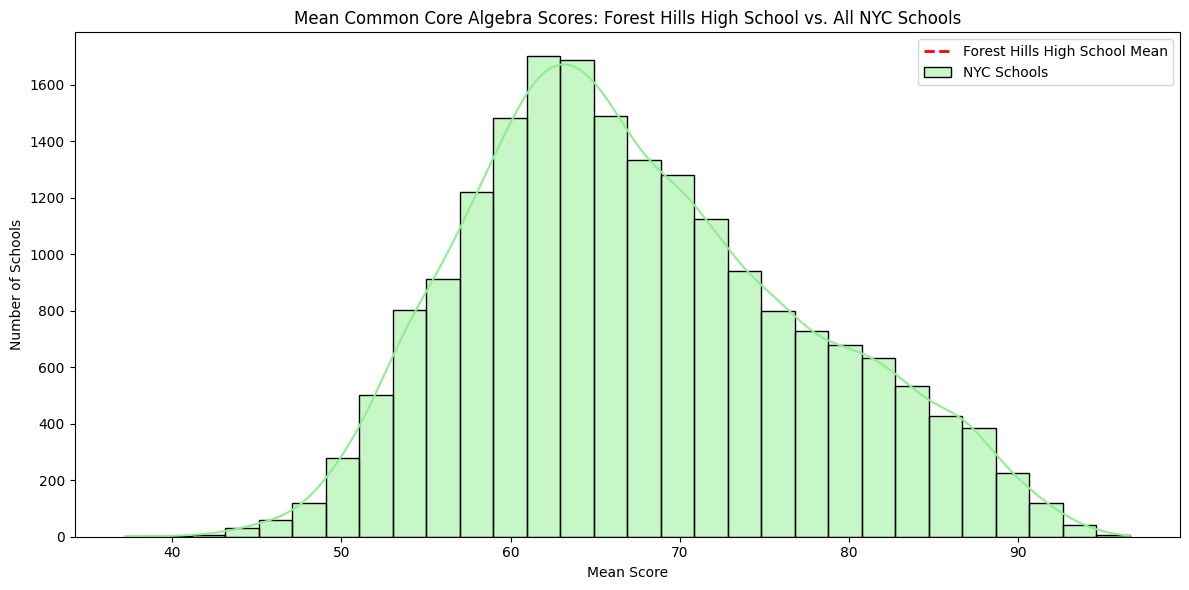

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv"
df = pd.read_csv(url)

df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

score_col = 'mean_score'
subject = 'Common Core Algebra'

df[score_col] = pd.to_numeric(df[score_col], errors='coerce')

df_clean = df[(df[score_col].notna()) & (df['regents_exam'].str.strip() == subject)]

#school choice
target_school = "Forest Hills High School"
school_df = df_clean[df_clean['school_name'].str.upper() == target_school]

# comparison: all NYC public schools (same subject of course)
nyc_df = df_clean.copy()

# stats
print(f"\nDescriptive stats for {target_school} ({subject}):")
print(school_df[score_col].describe())

print(f"\nDescriptive stats for all NYC public schools ({subject}):")
print(nyc_df[score_col].describe())

#Visualization
plt.figure(figsize=(12, 6))
sns.histplot(nyc_df[score_col], bins=30, kde=True, color='lightgreen', label='NYC Schools')
plt.axvline(school_df[score_col].mean(), color='red', linestyle='dashed', linewidth=2, label=f'{target_school} Mean')
plt.title(f'Mean {subject} Scores: {target_school} vs. All NYC Schools')
plt.xlabel('Mean Score')
plt.ylabel('Number of Schools')
plt.legend()
plt.tight_layout()
plt.show()

<Axes: >

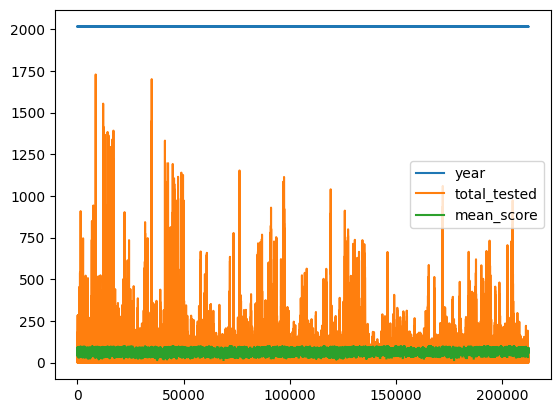

In [36]:
df.plot()

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'total_tested'}>],
       [<Axes: title={'center': 'mean_score'}>, <Axes: >]], dtype=object)

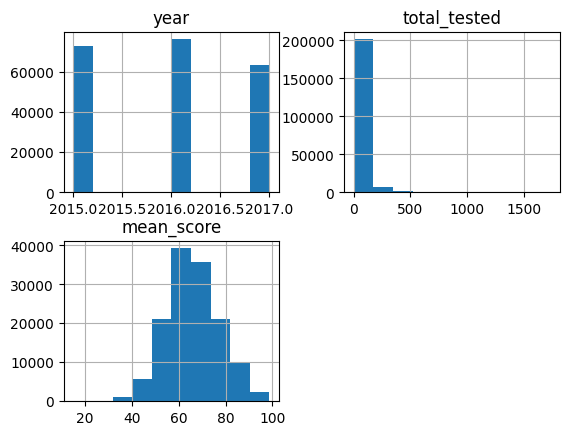

In [37]:
df.hist()

In [38]:
#conclusion
print("\nConclusion:")
print(f"{target_school} has a mean {subject} Regents score of {school_df[score_col].mean():.2f}, "
      f"compared to the citywide mean of {nyc_df[score_col].mean():.2f}. "
      "This comparison helps assess the school's relative performance across NYC.")


Conclusion:
Forest Hills High School has a mean Common Core Algebra Regents score of nan, compared to the citywide mean of 67.49. This comparison helps assess the school's relative performance across NYC.
